In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Objective: thermocouple case study

[Thermocouples](https://en.wikipedia.org/wiki/Thermocouple) are a device that produce a temperature-dependant voltage. The voltage that you measure can therefore be used to predict temperature.

In this case you will develop the linear regression model to **create your own temperature sensor**!


You acquire the following data in your lab (also called the *calibration step*)
    
    
| Voltage reading [mV]   | Temperature [K]  |
| --- | ---| 
| 0.01     |273  |
| 0.12     |293      | 
|  0.24 |  313    |  
|0.38| 333
|0.51|353
|0.67|373
|0.84|393
| 1.01|413
|1.15|433
|1.31|453

The data are also available here as a list:
* voltage = [0.01, 0.12, 0.24, 0.38, 0.51, 0.67, 0.84, 1.01, 1.15, 1.31]
* temperature = [273, 293, 313, 333, 353, 373, 393, 413, 433, 453]

### Requirements for this case

1. Follow the regular steps for creating a linear model: load your data, plot it, build the regression model, plot the result, and don't forget to check the residuals too!
1. What is the model's slope coefficient? Interpret it (in simple English, to a colleague, who has no understanding of statistics)
1. Calculate the $R^2$ and standard error, $S_E$ value for the provided data.
1. What does each of these numbers tell you about the model? In other words, interpret them in the context of the problem provided.
1. Test the model on new data (provided below), and make a prediction of temperature given the new data.
1. Calculate prediction error, a confidence limit, of the prediction.
1. Would you be satisfied with the predictions from this model in practice?
1. Think about what you have modelled here in terms of cause-and-effect. Normally the "cause" is the $x$-variable, and the $y$ variable is the "effect", the output. In this example, what is the cause, and what is the effect?


In [2]:
x_build = np.array([0.01, 0.12, 0.24, 0.38, 0.51, 0.67, 0.84, 1.01, 1.15, 1.31]).reshape(-1, 1)
y_build = np.array([ 273,  293,  313,  333,  353,  373,  393,  413,  433,  453])

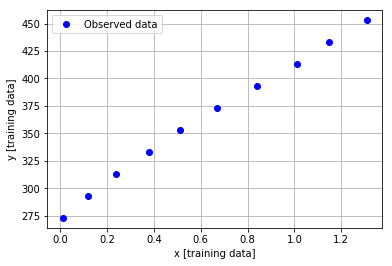

In [3]:
plt.plot(x_build, y_build, 'bo', label='Observed data')
plt.xlabel('x [training data]')
plt.ylabel('y [training data]')
plt.grid()
_ = plt.legend()

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Fit the model using the training data, and save it to the object ``model``
model = regr.fit(x_build, y_build)
y_predicted = regr.predict(x_build)
error = regr.predict(x_build) - y_build
dof = y_build.size - 2
S_E_calc = np.sqrt(np.sum((np.power(error, 2)))/dof)

In [5]:
print('Slope coefficient: {:.1f}'.format(model.coef_[0]))
print('Intercept: {:.1f}'.format(model.intercept_))
print('R^2 value: {:.3f}'.format(r2_score(y_pred=y_predicted, y_true=y_build)))
print('Standard error: {:.3f}'.format(S_E_calc))


Slope coefficient: 135.3
Intercept: 278.6
R^2 value: 0.996
Standard error: 3.916


### Interpretation of the model

1. The model coefficient of 135 can be interpreted as .... student fills this in.
2. The standard error value of 3.9 implies that ....
3. An $R^2$ coefficient value of .... indicates ....


### Plotting the model fit and residuals


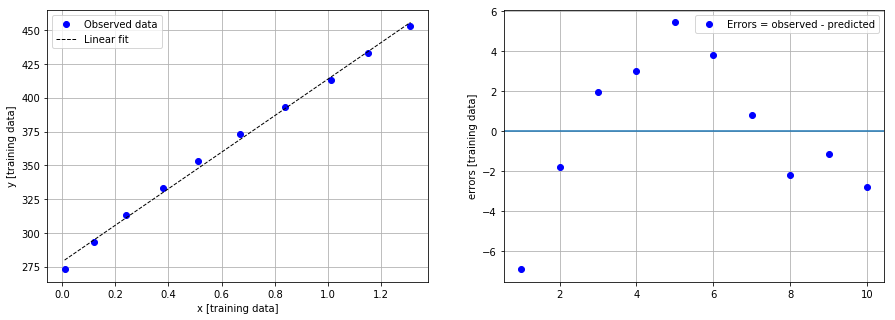

In [6]:
x_fit = np.array([min(x_build), max(x_build)]).reshape(-1, 1)
y_fit = regr.predict(x_fit)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(x_build, y_build, 'bo', label='Observed data')
plt.xlabel('x [training data]')
plt.ylabel('y [training data]')
plt.plot(x_fit.ravel(), y_fit.ravel(), '--', color='black', linewidth=1, label='Linear fit')
plt.grid()
_ = plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1,y_build.size+1), y_build-y_predicted, 'bo', label='Errors = observed - predicted')
plt.axhline(y=0)
plt.ylabel('errors [training data]')
plt.grid()
_ = plt.legend()
